In [48]:
import numpy as np
import pandas as pd
%matplotlib inline

# may need to change this line to match your local dir
FEATURE_PATH = './Data/Processed/train_features.csv'
TEST_FEATURE_PATH = './Data/Processed/test_features.csv'
WINDOW_SIZE = 4 #seconds

data = pd.read_csv(FEATURE_PATH)
test_data = pd.read_csv(TEST_FEATURE_PATH)


features = ['result_acc_mean', 'result_acc_median', 'result_acc_std', 'result_lin_acc_mean', 'result_lin_acc_median', 'result_lin_acc_std']

labels = ['standing', 'sitting', 'walking', 'laying_down']

def plot_data(label, feature):
    specific_data = data[data['label'] == label]
    #get a slice
    
    first_idx = 0
    count = 0
    # b.plot(subplots=True)
    idx = 1
    while True:
#         print(count)
        count = count + 1
        val = specific_data['timestamp_sec'].iloc[first_idx]

        while val + WINDOW_SIZE == specific_data['timestamp_sec'].iloc[idx]:
            val = specific_data['timestamp_sec'].iloc[idx]
            idx = idx + 1
            if idx == len(specific_data):
                break

        last_idx = idx
#         print('plotting ', first_idx, ' ', last_idx)
        c = specific_data[first_idx:last_idx].plot(x = 'timestamp_sec', y= feature, title='result_acc_mean for ' + label + ', session ' + str(count))

        first_idx = idx
        idx = idx + 1
        if idx >= len(specific_data):
            break

data = data.drop(columns=['steps_mean', 'steps_std'])
test_data.keys()

Index(['timestamp_sec', 'result_acc_mean', 'result_acc_median',
       'result_acc_std', 'result_acc_max', 'result_acc_min',
       'result_acc_cross_median', 'result_lin_acc_mean',
       'result_lin_acc_median', 'result_lin_acc_std', 'result_lin_acc_max',
       'result_lin_acc_min', 'lin_timestep', 'timestep', 'tot_lin_pow',
       'fst_dom_lin_freq', 'fst_dom_lin_pow', 'snd_dom_lin_freq',
       'snd_dom_lin_pow', 'third_dom_lin_freq', 'third_dom_lin_pow',
       'ratio_lin', 'tot_pow', 'fst_dom_freq', 'fst_dom_pow', 'snd_dom_freq',
       'snd_dom_pow', 'third_dom_freq', 'third_dom_pow', 'ratio', 'cat_label',
       'label_x', 'result_orient_mean', 'result_orient_median',
       'result_orient_std', 'label_y', 'steps_mean', 'steps_std'],
      dtype='object')

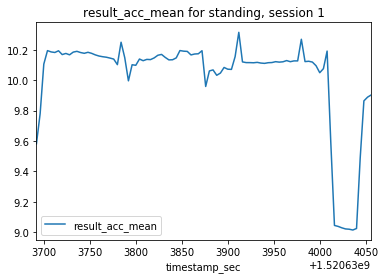

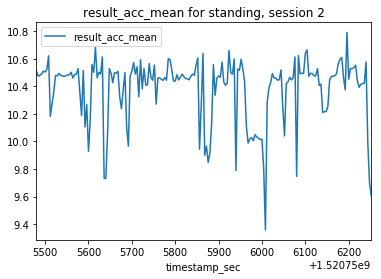

In [8]:
plot_data(labels[0], features[0])


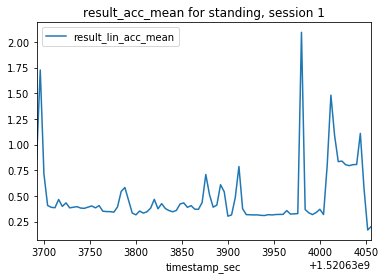

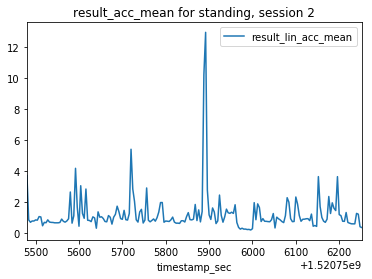

In [9]:
plot_data(labels[0], features[3])

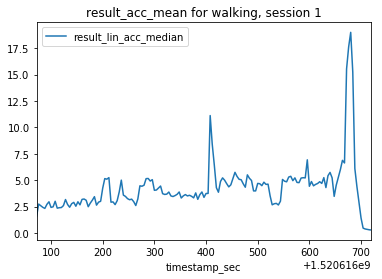

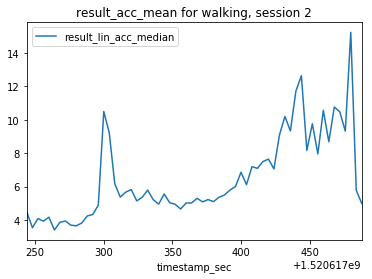

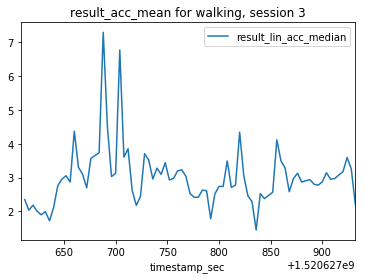

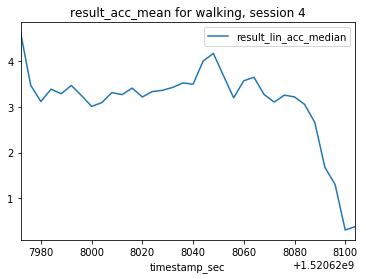

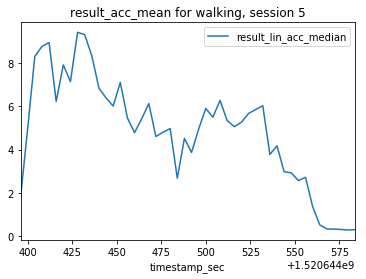

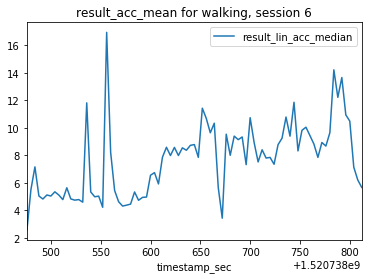

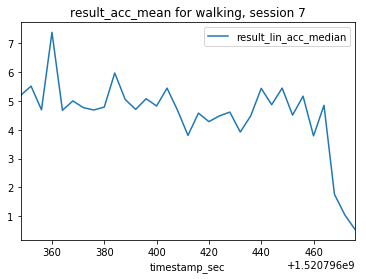

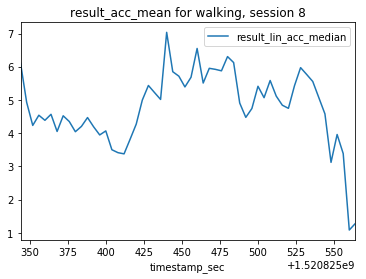

In [10]:
plot_data(labels[2], features[4])

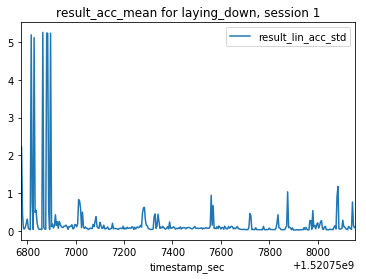

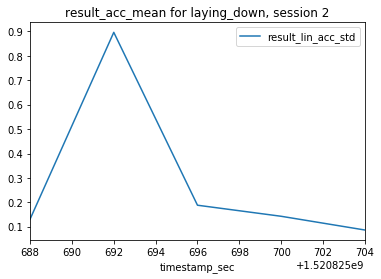

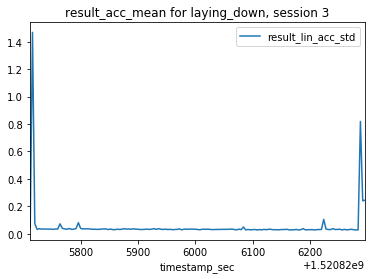

In [11]:
plot_data(labels[3], features[5])

In [2]:
pd.__version__

'0.22.0'

In [49]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

feature_keys = ['result_acc_mean', 'result_acc_median',
       'result_acc_std', 'result_acc_max', 'result_acc_min',
       'result_acc_cross_median', 'result_lin_acc_mean',
       'result_lin_acc_median', 'result_lin_acc_std', 'result_lin_acc_max',
       'result_lin_acc_min', 'tot_lin_pow',
       'fst_dom_lin_freq', 'fst_dom_lin_pow', 'snd_dom_lin_freq',
       'snd_dom_lin_pow', 'third_dom_lin_freq', 'third_dom_lin_pow',
       'ratio_lin', 'tot_pow', 'fst_dom_freq', 'fst_dom_pow', 'snd_dom_freq',
       'snd_dom_pow', 'third_dom_freq', 'third_dom_pow', 'ratio']

data = data.dropna()
data = data[data.label_x != 'unknown']
data = data[data.label_x != 'null']
data_train = data
data_test = test_data
data = data.sample(frac=1)

# data_train, data_test = train_test_split(data, test_size = 0.2)

clf = svm.SVC(class_weight = 'balanced')
features = data_train[feature_keys].values.astype('float64')
# features = StandardScaler().fit_transform(features)
labels = data_train['label_x'].values.astype('str')
# new_labels = labels.replace(['sitting', 'standing', 'walking', 'laying_down'], [0,1,2,3])


clf.fit(features, labels)
# dec = decision_function([[1]])
prediction = clf.predict(data_test[feature_keys].values.astype('float64'))

num_correct = 0
num_total = len(prediction)
num_sitting = 0

y_true = []

for (idx, val) in enumerate(data_test.label_x):
    pred = prediction[idx]
    if val == 'sitting':
        num_sitting = num_sitting + 1
    if pred == val:
        num_correct = num_correct + 1

print('accuracy: ', num_correct / num_total)
print('sitting: ', num_sitting / num_total)

confusion_matrix(data_test.label_x, prediction, labels=['sitting', 'standing', 'walking', 'laying_down'])


accuracy:  0.4984025559105431
sitting:  0.19169329073482427


array([[34, 13,  1, 12],
       [27, 14,  2, 16],
       [ 1,  0, 78,  0],
       [82,  3,  0, 30]])

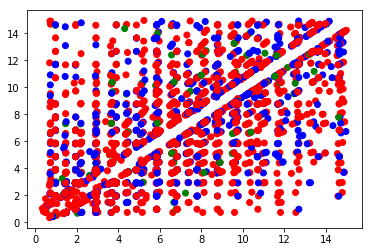

In [61]:
test = features
labels_test = data_train['label_x'].replace(['sitting', 'standing', 'walking', 'laying_down'], ['red','green','blue','purple']).iloc[1:1000]
import matplotlib.pyplot as plt
a = np.zeros(len(test))
feature_idx = feature_keys.index('fst_dom_freq')
feature_idx2 = feature_keys.index('snd_dom_freq')

plt.scatter(test[:,feature_idx], test[:,feature_idx2] , c = labels_test)